# BOSTON HOUSE PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston().data

boston = pd.DataFrame(boston , columns = [load_boston().feature_names])
housePrice = load_boston().target

boston['house prices'] = housePrice

import seaborn as sns



C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


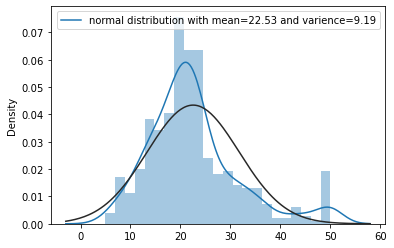

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
(m,s) = norm.fit(boston['house prices'])

sns.distplot(boston['house prices'] , fit = norm )
plt.legend(['normal distribution with mean={:.2f} and varience={:.2f}'.format(m,s)] , loc='best')




Text(0, 0.5, 'HOUSE PRICES AT THAT AREA')

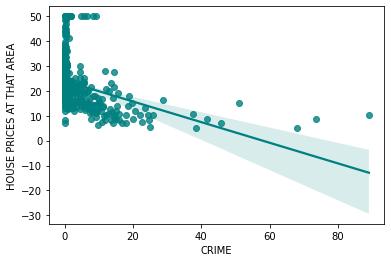

In [5]:
sns.regplot(y=boston['house prices'] , x=boston['CRIM'] , color='teal')

plt.xlabel('CRIME')
plt.ylabel('HOUSE PRICES AT THAT AREA')

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel="('AGE',)", ylabel="('CRIM',)">

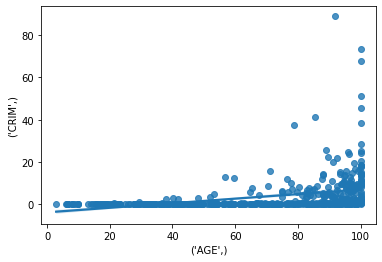

In [7]:
sns.regplot(y=boston['CRIM'] , x=boston['AGE'] )

<Figure size 2880x2880 with 0 Axes>

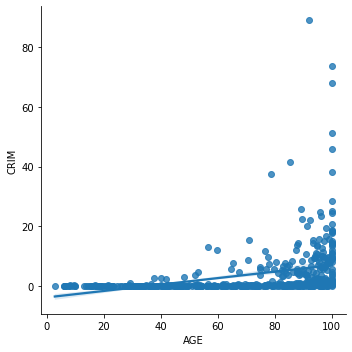

In [8]:
plt.figure(figsize=(40,40))
sns.lmplot(y='CRIM' , x="AGE" , data=boston )

In [9]:
boston.nunique()

CRIM            504
ZN               26
INDUS            76
CHAS              2
NOX              81
RM              446
AGE             356
DIS             412
RAD               9
TAX              66
PTRATIO          46
B               357
LSTAT           455
house prices    229
dtype: int64

In [10]:
boston.isnull().sum()

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
house prices    0
dtype: int64

In [11]:
boston[boston.isnull().any(axis=1)]     # show where the null value is , axis = 1 means ROWS

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house prices


<AxesSubplot:xlabel='None', ylabel='None'>

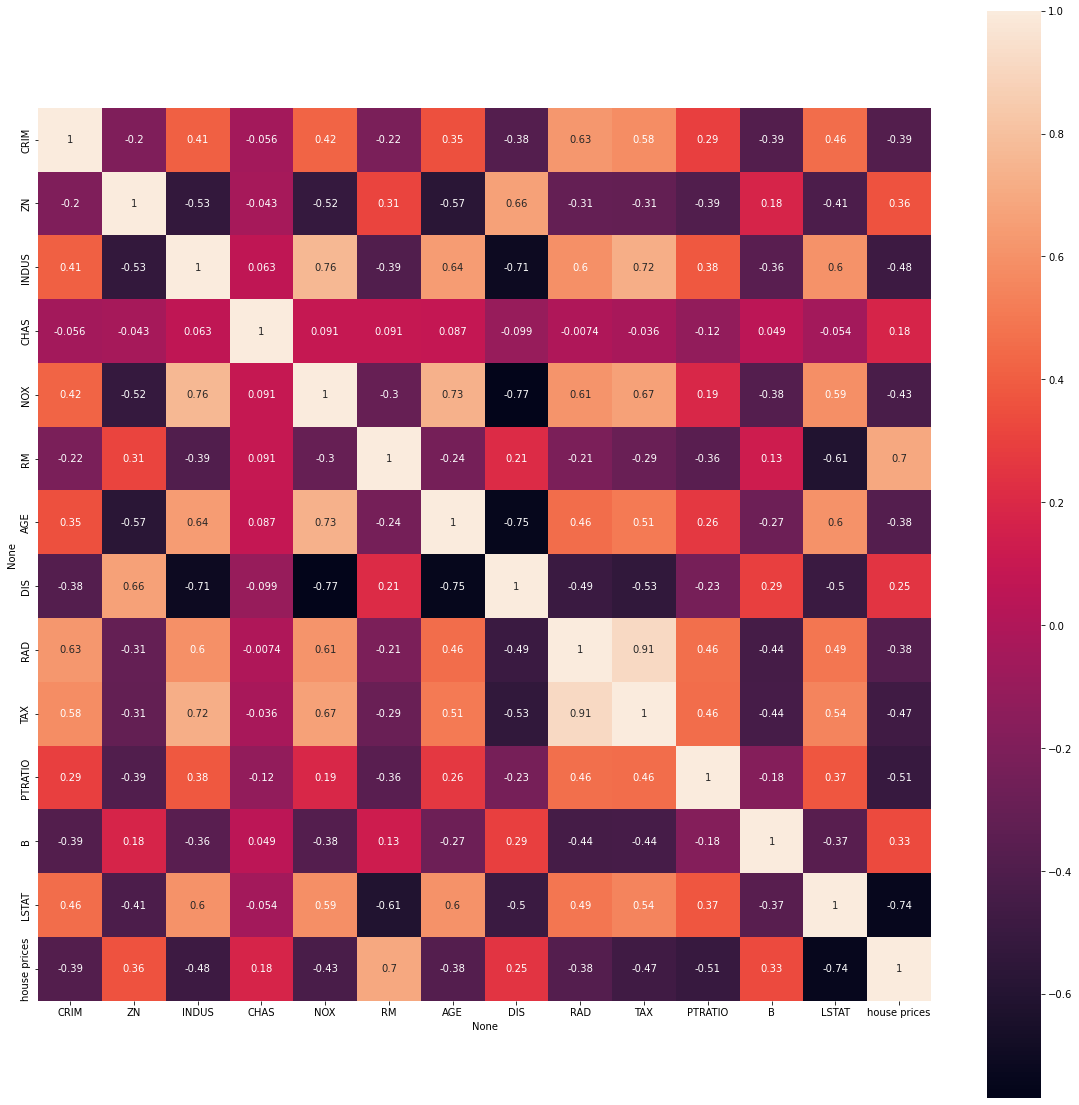

In [12]:
cor=boston.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor , square=True ,annot=True)

In [13]:
x = boston.drop('house prices' , axis=1)
y = boston['house prices']

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.3,random_state=4)


C:\Users\souvi\AppData\Local\Temp\ipykernel_30420\518281567.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = boston.drop('house prices' , axis=1)


In [14]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train , y_train)  #train the model using training data

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [15]:
lm.intercept_            # value of y intercept

array([36.35704138])

In [16]:
coeff = pd.DataFrame([x_train.columns , lm.coef_.T]).T
coeff = coeff.rename(columns = {0:'attribute' , 1:'coefficients'})
coeff

,attribute,coefficients
0,"(CRIM,)",[-0.12256979473292123]
1,"(ZN,)",[0.05567769959683249]
2,"(INDUS,)",[-0.00883428230074687]
3,"(CHAS,)",[4.693448486974741]
4,"(NOX,)",[-14.435782767774592]
5,"(RM,)",[3.2800803252777775]
6,"(AGE,)",[-0.0034477815653828734]
7,"(DIS,)",[-1.5521441903114432]
8,"(RAD,)",[0.3262496181737417]
9,"(TAX,)",[-0.014066550031720033]


In [17]:
# Prediction model using training data
y_pred = lm.predict(x_train)


C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
# Model evaluation
from sklearn import metrics
print('R-sq: ' , metrics.r2_score(y_train , y_pred))
print('adjusted R-sq: ' , 1-(1-metrics.r2_score(y_train , y_pred)) * (len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R-sq:  0.7465991966746854
adjusted R-sq:  0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


# LINEAR REGRESSION

In [19]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [20]:
x = boston.drop('house prices' , axis = 1)
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.3,random_state=4)

C:\Users\souvi\AppData\Local\Temp\ipykernel_30420\3822808435.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = boston.drop('house prices' , axis = 1)


In [21]:
lm=LinearRegression()
lm.fit(x_train , y_train)

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [22]:
lm.intercept_

array([36.35704138])

In [23]:
coef = pd.DataFrame([x_train.columns.T , lm.coef_.T]).T
coef = coef.rename(columns = {0:'Covariate' , 1:'intercept'})
coef

,Covariate,intercept
0,"(CRIM,)",[-0.12256979473292123]
1,"(ZN,)",[0.05567769959683249]
2,"(INDUS,)",[-0.00883428230074687]
3,"(CHAS,)",[4.693448486974741]
4,"(NOX,)",[-14.435782767774592]
5,"(RM,)",[3.2800803252777775]
6,"(AGE,)",[-0.0034477815653828734]
7,"(DIS,)",[-1.5521441903114432]
8,"(RAD,)",[0.3262496181737417]
9,"(TAX,)",[-0.014066550031720033]


In [24]:
y_pred = lm.predict(x_train)

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [25]:
print('r-sq:',metrics.r2_score(y_train , y_pred))
print('MSE:',metrics.mean_squared_error(y_train , y_pred))
print('MAE:',metrics.mean_absolute_error(y_pred , y_train))

r-sq: 0.7465991966746854
MSE: 19.07368870346903
MAE: 3.08986109497113


Text(0.5, 1.0, 'predicted vs actual house prices')

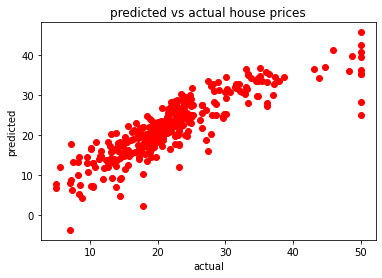

In [26]:
# predicted vs train scatterplot
plt.scatter(y = y_pred , x = y_train , color = 'red')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('predicted vs actual house prices')

Text(0, 0.5, 'residuals')

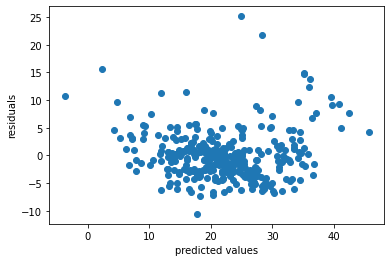

In [27]:
# predicted vs residue scatterplot
plt.scatter(x=y_pred , y=y_train-y_pred)
plt.xlabel('predicted values')
plt.ylabel('residuals')

<AxesSubplot:ylabel="('house prices',)">

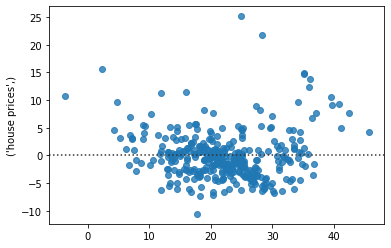

In [28]:
sns.residplot(x = y_pred , y = y_train)

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

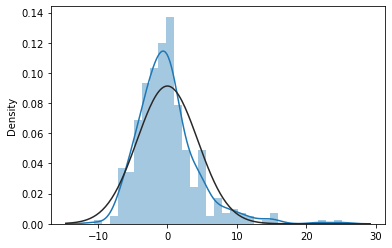

In [29]:
#checking normality of the residuals
sns.distplot(y_train-y_pred , fit=norm)

# ALMOST NORMALLY DISTRIBUTED, SO THE NORMALITY ASSUMPTION IS SATISFIED

In [30]:
# Predicting Test data with the model
y_test_pred = lm.predict(x_test)

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [31]:
from sklearn import metrics
print('ALL THE CALCULATIONS IS FOR TESTING DATA , TO CHECK THE FITTING TYPE BY COMPARING WITH THE TRAINING DATA')
r_lin = metrics.r2_score(y_test , y_test_pred)
print('R-square: ' , metrics.r2_score(y_test , y_test_pred))
print('adjusted R-square: ',1-(1-metrics.r2_score(y_test , y_test_pred)) * (len(y_test)-1) / (len(y_test) -len(x_test.columns)-1))
print('Adjusted R^2:        ',      1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)) #same but different formula
print('MSE: ' , metrics.mean_squared_error(y_test , y_test_pred))
print('MAE: ' , metrics.mean_absolute_error(y_test , y_test_pred))

ALL THE CALCULATIONS IS FOR TESTING DATA , TO CHECK THE FITTING TYPE BY COMPARING WITH THE TRAINING DATA
R-square:  0.7121818377409195
adjusted R-square:  0.6850685326005713
Adjusted R^2:         0.6850685326005713
MSE:  30.053993307124127
MAE:  3.8590055923707407


In [32]:
from scipy.stats import norm , skew , kurtosis

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

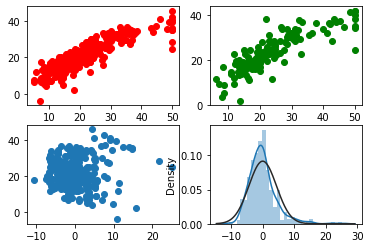

In [33]:
figure , axis = plt.subplots(2,2)
axis[0,0].scatter(y = y_pred , x = y_train , color = 'red')
axis[0,1].scatter(y = y_test_pred , x = y_test , color = 'green')
axis[1,0].scatter(y = y_pred , x = y_train - y_pred)
sns.distplot(y_train-y_pred , fit = norm)

In [34]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# RANDOM FOREST REGRESSOR

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = boston.drop('house prices' , axis = 1)
y = boston['house prices']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.3 , random_state=4)

C:\Users\souvi\AppData\Local\Temp\ipykernel_30420\4071117914.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = boston.drop('house prices' , axis = 1)


In [37]:
from sklearn.ensemble import RandomForestRegressor
RfReg = RandomForestRegressor() 
RfReg.fit(x_train , y_train)

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\souvi\AppData\Local\Temp\ipykernel_30420\3117656539.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RfReg.fit(x_train , y_train)


RandomForestRegressor()

In [38]:
y_pred = RfReg.predict(x_train)

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'predicted house prices vs actual house prices')

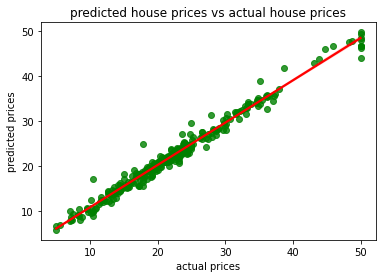

In [39]:
sns.regplot(y = y_pred , x = y_train , line_kws={"color": "red"} , scatter_kws={'color' : 'green'})
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title('predicted house prices vs actual house prices')

In [40]:
from sklearn import metrics

In [41]:
print('values regarding training data , using RANDOM FOREST')
print('R-sq: ' , metrics.r2_score(y_pred , y_train))
print('adj R-sq: ' , 1-(1-metrics.r2_score(y_train , y_pred)) * (len(y_train) - 1) / (len(y_train) - len(x_train.columns) - 1))
print('MAE: ' , metrics.mean_absolute_error(y_train , y_pred))
print('MSE: ' , metrics.mean_squared_error(y_train , y_pred))
print('RMSE: ' , np.sqrt(metrics.mean_squared_error(y_train , y_pred)))

values regarding training data , using RANDOM FOREST
R-sq:  0.9772028496479277
adj R-sq:  0.9786383384125232
MAE:  0.8455932203389831
MSE:  1.5486951751412443
RMSE:  1.2444658191936186


In [42]:
y_test_pred = RfReg.predict(x_test)

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [43]:
print('prdicting the testing data , with the help of the random forest model: ')
r_rf = metrics.r2_score(y_test , y_test_pred)
print('R-sq: ' , metrics.r2_score(y_test , y_test_pred))
print('adjusted R-square: ' , 1-(1-metrics.r2_score(y_test , y_test_pred)) * (len(y_test) - 1) / (len(y_test) -x_test.shape[1] - 1))
print('MSE: ' , metrics.mean_squared_error(y_test , y_test_pred))       #pattern = (actual , predicted)

prdicting the testing data , with the help of the random forest model: 
R-sq:  0.8319228467296257
adjusted R-square:  0.816089491711402
MSE:  17.550628493421065


In [46]:
# again importing the dataset
from sklearn.datasets import load_boston
data = pd.DataFrame(load_boston().data,columns=[load_boston().feature_names])
data['house prices'] = load_boston().target
data.head()

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
x = data.drop('house prices' , axis = 1)
y = data['house prices']

C:\Users\souvi\AppData\Local\Temp\ipykernel_9380\2055187789.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = data.drop('house prices' , axis = 1)


In [48]:
import matplotlib.pyplot as plt

# XGBOOST REGRESSOR

In [49]:
# importing XGBOOST library
!pip install xgboost

In [50]:
from xgboost import XGBRegressor

In [51]:
XgReg = XGBRegressor()

In [52]:
from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3)

In [53]:
XgReg.fit(x_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [54]:
y_pred =  XgReg.predict(x_train)

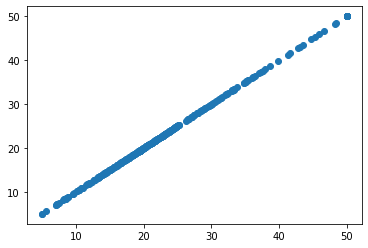

In [55]:
plt.scatter(y_train , y_pred)

In [56]:
from sklearn import metrics
metrics.mean_squared_error(y_train , y_pred)

0.00021701521375612506

In [57]:
metrics.mean_absolute_error(y_train , y_pred)

0.010027904833777537

In [58]:
a = np.array(y_train)
print(a[200])
y_pred[200]

[23.5]


23.49691

In [59]:
pd.DataFrame(y_pred).isnull().sum()

0    0
dtype: int64

<AxesSubplot:ylabel="('house prices',)">

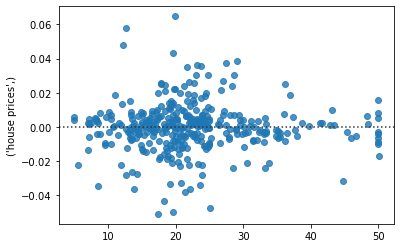

In [60]:
sns.residplot(x = y_pred , y = y_train)

In [61]:
# comparing with testing data
y_test_pred = XgReg.predict(x_test)

In [62]:
r_xgb = metrics.r2_score(y_test , y_test_pred)

print('rsq: ' , metrics.r2_score(y_test , y_test_pred))
print('MSE: ' , metrics.mean_squared_error(y_test , y_test_pred))
print('MAE: ' , metrics.mean_absolute_error(y_test , y_test_pred))
print('adjusted rsq: ' , 1-(1-metrics.r2_score(y_test , y_test_pred)) * (len(y_test)-1) / (len(y_test) - len(x_test.columns) - 1))

rsq:  0.8833174265675888
MSE:  10.118757564389478
MAE:  2.3142020106315613
adjusted rsq:  0.872325589939898


# SVM regressor

In [63]:
from sklearn.preprocessing import StandardScaler     # just standarised the training and testing values , for good prediction

In [64]:
sc = StandardScaler()

In [65]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)       #x_train, x_test are no longer a data frame , these have become ndarray now

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [66]:
from sklearn.svm import SVR

In [67]:
svm = SVR()

In [68]:
svm.fit(x_train , y_train)                   # fitting the SVM regression model in the standarised data

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [69]:
y_pred = svm.predict(x_train)

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'SVM- predicted vs actual prices')

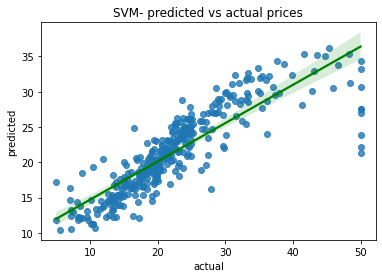

In [70]:
sns.regplot(y_train , y_pred , line_kws = {'color':'green'})
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('SVM- predicted vs actual prices')

C:\Users\souvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel="('house prices',)">

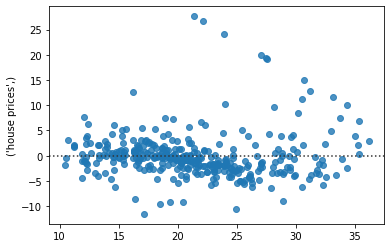

In [71]:
sns.residplot(y_pred , y_train)

In [72]:
# building the svm model for testing data
y_test_pred = svm.predict(x_test)

In [73]:
from sklearn import metrics

# printing features from training data
print('r2 : ' , metrics.r2_score(y_train , y_pred))
print('adjusted r2 : ' , 1-(1-metrics.r2_score(y_train , y_pred)) * (len(y_train) - 1) / (len(y_train) -x_train.shape[1]-1))
print('MSE : ' , metrics.mean_squared_error(y_train , y_pred))
print('MAE : ' , metrics.mean_absolute_error(y_train , y_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_train , y_pred)))

r2 :  0.6760895048378417
adjusted r2 :  0.6637046917875239
MSE :  27.003962161057068
MAE :  2.9700423585774653
RMSE :  5.196533667846007


In [74]:
# printing features from testing data
r_svm = metrics.r2_score(y_test , y_test_pred)
print('r2 : ' , metrics.r2_score(y_test , y_test_pred))
print('adjusted r2 : ' , 1-(1-metrics.r2_score(y_test , y_test_pred)) * (len(y_test) - 1) / (len(y_test) -x_test.shape[1]-1))
print('MSE : ' , metrics.mean_squared_error(y_test , y_test_pred))
print('MAE : ' , metrics.mean_absolute_error(y_test , y_test_pred))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test , y_test_pred)))

r2 :  0.6162724765221992
adjusted r2 :  0.5801242315568991
MSE :  33.276998155209455
MAE :  3.198205298946229
RMSE :  5.768621859266688


# comparing the models

In [75]:
models = pd.DataFrame({'model name' : ['linear' , 'random_forest' , 'xgboost' , 'svm regressor'] , 'R-sq score _ test' : [r_lin*100 , r_rf*100 , r_xgb*100 , r_svm*100]})

In [258]:
models

,model name,R-sq score _ test
0,linear,71.218184
1,random_forest,82.422434
2,xgboost,84.766005
3,svm regressor,65.617736


In [ ]:
 #############################################CONCLUSION ############################################################
    ##############################################################################################################
        ######## so we can see that random_forest regressor is the best among these four regressor ########

In [4]:
############################################################################

In [5]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
X = data['age']
y = data['sex']

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
X = np.array(X)
X = sc.fit_transform(X.reshape(len(X),1))
X

y = np.array(y)
y = sc.fit_transform(y.reshape(-1 , 1))
y

array([[ 1.06548848],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [-0.93853666],
       [-0.93853666],
       [ 1.06548848],
       [ 1.06548848],
       [ 1.06548848],
       [-0.93853666],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [-0.93853666],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [-0.93853666],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [-0.93853666],
       [ 1.06548848],
       [ 1.06548848],
       [ 1.06548848],
       [-0.93853666],
       [ 1.06548848],
       [-0.93853666],
       [ 1.06548848],
       [ 1

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = .2  )                                                

In [28]:
from sklearn.svm import SVR
svr= SVR(kernel='rbf')

svr.fit(X_train , y_train)

y_pred = svr.predict(X_test)

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


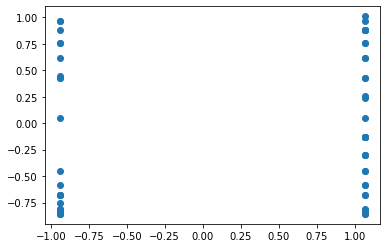

In [87]:
price = boston['house prices']
price = np.array(price).reshape(-1,1)
age = boston['AGE']
age = np.array(age).reshape(-1,1)
from sklearn.svm import SVR
reg = SVR(kernel='rbf')

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
price = sc_x.fit_transform(price)
age = sc_y.fit_transform(age)


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train , X_test , y_train , y_test = train_test_split(age , price , test_size=.2)

In [90]:
from sklearn.svm import SVR
reg = SVR(kernel='rbf')

reg.fit(X_train , y_train)

y_pred = reg.predict(X_test)
type(y_test)

C:\Users\souvi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


numpy.ndarray

In [91]:
y_test = sc_y.inverse_transform(y_test.reshape(-1,1))
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))
result1 = pd.DataFrame({'actual values':y_test.reshape(-1) , 'svm predicted values' : y_pred.reshape(-1)})

In [92]:
result1

,actual values,svm predicted values
0,152.641605,50.383056
1,54.701693,45.661386
2,41.847080,44.659181
3,112.853516,76.378894
4,54.089569,46.461572
...,...,...
97,62.659311,69.907685
98,81.329107,56.002596
99,38.174333,47.679839
100,46.131951,51.630083


C:\Users\souvi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual values', ylabel='svm predicted values'>

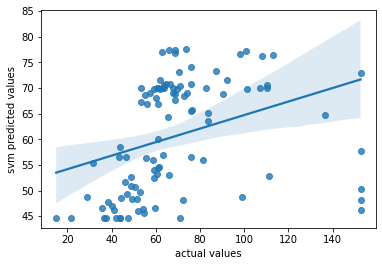

In [96]:
sns.regplot(result1['actual values'] , result1['svm predicted values'])